In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import chdtri
from scipy import stats

In [2]:
data = np.genfromtxt('lab1.csv', delimiter=',')


In [3]:
def z(z):
    return (1 / (np.sqrt(2 * np.pi))) * np.exp(0.5 * -z**2)

def pirson(data,intervals_count,alpha):
    n_teory, bins = np.histogram(data, 8)
    n = len(data)
    h = bins[1] - bins[0]
    mean = np.mean(data)
    std = np.std(data, ddof=1) * n / (n - 1)
    mean_bins = np.zeros(len(bins) - 1) 
    
    for i in range(len(bins) - 1):
        mean_bins[i] = (bins[i] + bins[i + 1]) / 2
        
    k = len(mean_bins)
    n_practice = (h * n / std) * z((mean_bins - mean) / std)
    chi_2_critical = chdtri(k - 3, alpha)
    chi_2_teory = np.sum(np.square(n_teory - n_practice) / n_practice)
    
#     print(n_teory)
#     print(n_practice)
    print(chi_2_critical)
    print(chi_2_teory)
    if chi_2_critical > chi_2_teory:
        print('Немає підстав відхилити гіпотезу про нормальний розподіл')
    else:
        print('Відхиляємо гіпотезу про нормальний розподіл')
    
    
pirson(data, 8, 0.05)

11.070497693516355
6.742219061736154
Немає підстав відхилити гіпотезу про нормальний розподіл


In [5]:
def kolmogorov_smirnov(data, alpha):
    k2, p = stats.kstest(data,'norm',mode='exact',args=(np.mean(data),np.std(data)))
    print(p)
    if p < alpha:
        print('Немає підстав відхилити гіпотезу про нормальний розподіл')
    else:
        print('Відхиляємо гіпотезу про нормальний розподіл')    
kolmogorov_smirnov(data, 0.05)

0.25417236355518513
Відхиляємо гіпотезу про нормальний розподіл


#### Я отримав за двома незалежними тестами висновок про те, що мої дані розподілені за нормальним законом. В мене немає підстав відхиляти нульову гіпотезу про те, що дані розподілені за нормальним законом.

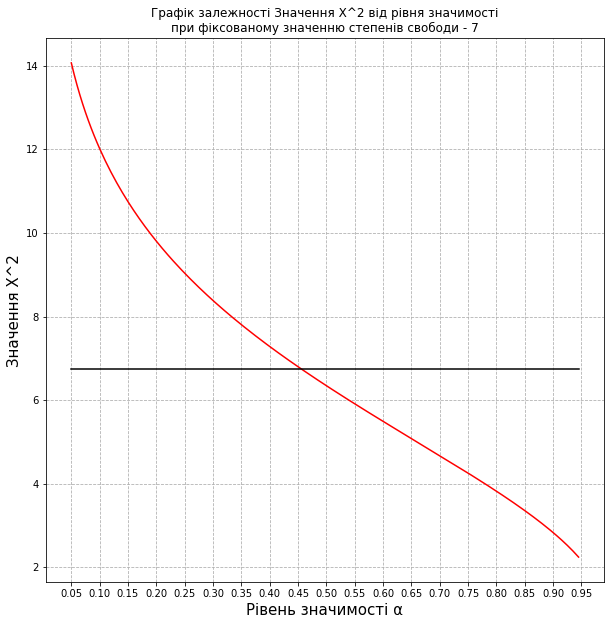

In [5]:
alphas = np.arange(0.05,0.95, 0.005)
chi_2_criticals = []

for alpha in alphas:
    chi_2_criticals.append(chdtri(10 - 3, alpha))
    
chi_2_criticals = np.array(chi_2_criticals)

fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.plot(alphas,chi_2_criticals, c='red')
axes.plot(alphas, [6.74]*len(alphas), c='black')
axes.set_xticks(np.arange(0.05,0.951, 0.05))
axes.set_xlabel('Рівень значимості α', fontsize=15)
axes.set_ylabel('Значення Χ^2', fontsize=15)
axes.set_title('Графік залежності Значення Χ^2 від рівня значимості\nпри фіксованому значенню степенів свободи - 7')
axes.grid(True, linestyle='--')
plt.show()

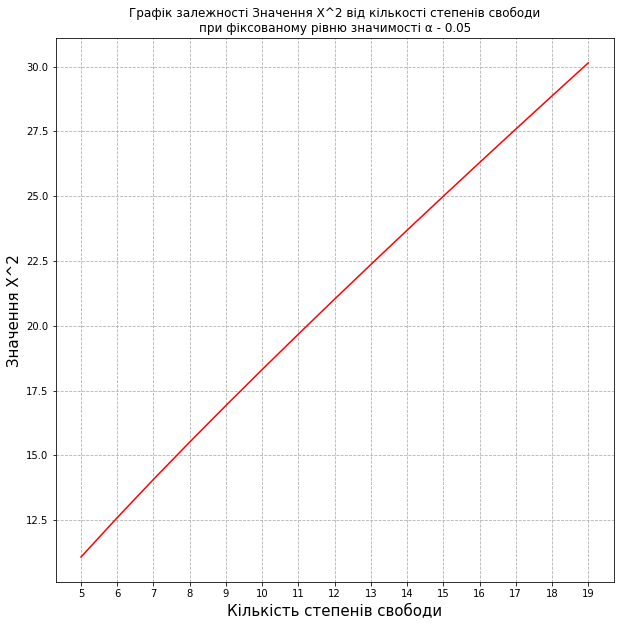

In [6]:
degrees_of_freedom = range(5,20)

chi_2_criticals = []

for d in degrees_of_freedom:
    chi_2_criticals.append(chdtri(d, 0.05))
    
chi_2_criticals = np.array(chi_2_criticals)

fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.plot(degrees_of_freedom,chi_2_criticals, c='red')
axes.set_xticks(range(5,20))
axes.set_xlabel('Кількість степенів свободи', fontsize=15)
axes.set_ylabel('Значення Χ^2', fontsize=15)
axes.set_title('Графік залежності Значення Χ^2 від кількості степенів свободи\nпри фіксованому рівню значимості α - 0.05')
axes.grid(True, linestyle='--')
plt.show()

# Додаткове завдання

### Зчитування даних

In [7]:
file = open('Data2.csv','r')
text = file.read()
text = text.replace(',','.')
file = open('Data2.csv','w')
file.write(text)
file.close()

In [8]:
df = pd.read_csv('Data2.csv', delimiter=';',encoding='ANSI')

### Перевірка та очистка даних

In [9]:
df.describe()

,GDP per capita,Populatiion,CO2 emission,Area
count,190.000000,2.160000e+02,2.050000e+02,2.170000e+02
mean,13374.833168,3.432256e+07,1.651141e+05,6.126082e+05
std,18091.785849,1.347600e+08,8.335357e+05,1.829940e+06
min,-6722.223536,1.109700e+04,1.100100e+01,-6.765900e+05
25%,1926.540477,7.900265e+05,1.334788e+03,1.045000e+04
50%,5226.289415,6.221590e+06,9.108828e+03,9.222500e+04
75%,16003.299818,2.350337e+07,5.986378e+04,4.474000e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


In [10]:
df.head()

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


In [12]:
gdp_negative = df[df['GDP per capita'] < 0]

df.loc[df['GDP per capita'] < 0,'GDP per capita' ] *= -1
df.loc[df['Area'] < 0,'Area' ] *= -1

df.fillna(df.mean(), inplace=True)

### Перевірка на нормальність числових стовбчиків датасету

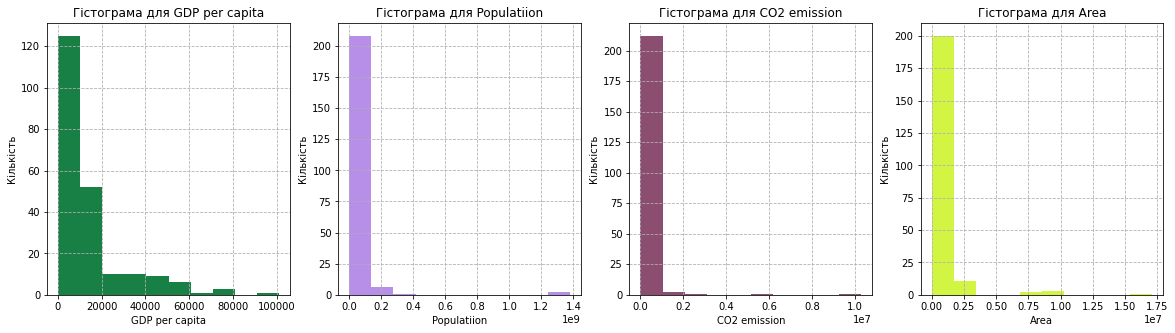

In [13]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

columns = ['GDP per capita','Populatiion', 'CO2 emission', 'Area']

for i in range(len(axes)):
    axes[i].hist(df[columns[i]], color=np.random.rand(3,))
    axes[i].set_title(f'Гістограма для {columns[i]}')
    axes[i].set_xlabel(f'{columns[i]}')
    axes[i].set_ylabel(f'Кількість')
    axes[i].grid(True, linestyle='--')

In [14]:
for column in columns:
    k2, p = stats.normaltest(df[column])
    if p > 0.05:
        print(f'Немає підстав відхилити гіпотезу про нормальний розподіл для {column} на основі тесту D’Agostino та Pearson')
    else:
        print(f'Відхиляємо гіпотезу про нормальний розподіл для {column} на основі тесту D’Agostino та Pearson')

Відхиляємо гіпотезу про нормальний розподіл для GDP per capita на основі тесту D’Agostino та Pearson
Відхиляємо гіпотезу про нормальний розподіл для Populatiion на основі тесту D’Agostino та Pearson
Відхиляємо гіпотезу про нормальний розподіл для CO2 emission на основі тесту D’Agostino та Pearson
Відхиляємо гіпотезу про нормальний розподіл для Area на основі тесту D’Agostino та Pearson


### Перевірити середні та медіани на значимість


In [15]:
# names = ['GDP per capita','Populatiion','CO2 emission','Area']

# print('Перевірка середніх на значимість')
# for i in range(len(names)):
#     data = df[names[i]].to_numpy()
#     t_stat, p_value = stats.ttest_1samp(a=data,popmean=data.mean())
#     if p_value < 0.05:
#         print(f'P_value для {names[i]} = {p_value}, відкидаємо гіпотезу Н0 про значимість середнього')
#     else:
#         print(f'P_value для {names[i]} = {p_value}, приймаємо гіпотезу Н0 про значимість середнього')
    
# print('Перевірка медіан на значимість') 
# for i in range(len(names)):
#     data = df[names[i]].to_numpy()
#     t_stat, p_value = stats.wilcoxon(data-np.median(data))
#     if p_value < 0.05:
#         print(f'P_value для {names[i]} = {p_value}, відкидаємо гіпотезу Н0 про значимість медіани')
#     else:
#         print(f'P_value для {names[i]} = {p_value}, приймаємо гіпотезу Н0 про значимість медіани')
    

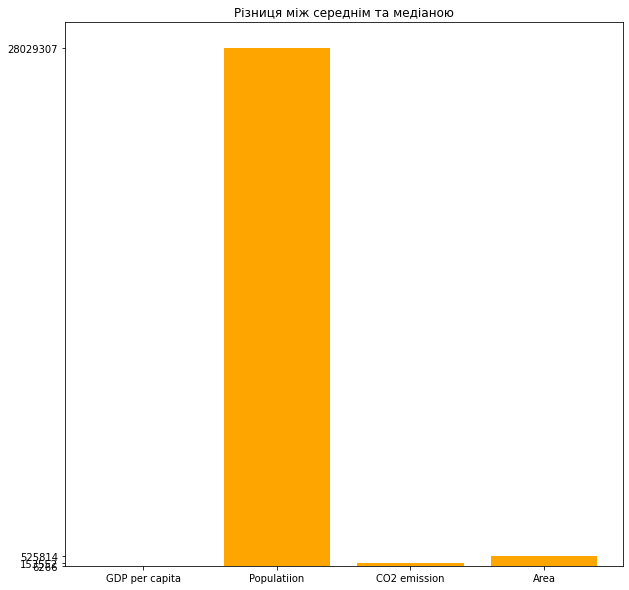

In [16]:
names = ['GDP per capita','Populatiion','CO2 emission','Area']

bar_values = []
bar_labels = []
for i in range(len(names)):
    bar_values.append(np.mean(df[names[i]]) - np.median(df[names[i]]))
    bar_labels.append(f'{names[i]}')


fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.bar(bar_labels,bar_values,color='orange')
axes.set_xticks(bar_labels)
axes.set_yticks(bar_values)
axes.set_title('Різниця між середнім та медіаною')
plt.show()

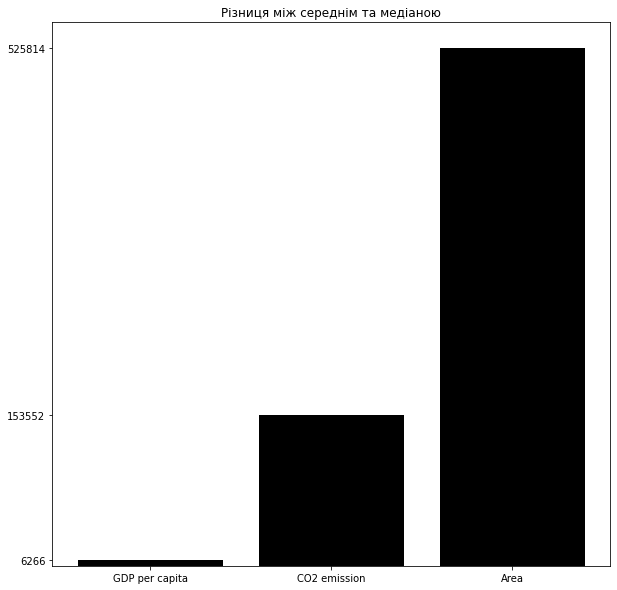

In [17]:
names = ['GDP per capita','CO2 emission','Area']

bar_values = []
bar_labels = []
for i in range(len(names)):
    bar_values.append(np.mean(df[names[i]]) - np.median(df[names[i]]))
    bar_labels.append(f'{names[i]}')


fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.bar(bar_labels,bar_values,color='black')
axes.set_xticks(bar_labels)
axes.set_yticks(bar_values)
axes.set_title('Різниця між середнім та медіаною')
plt.show()

### Вказати, в якому регіоні розподіл викидів СО2 найбільш близький до нормального

Дані "South Asia" НЕ відповідають нормальному закону
Дані "Europe & Central Asia" НЕ відповідають нормальному закону
Дані "Middle East & North Africa" НЕ відповідають нормальному закону
Дані "East Asia & Pacific" НЕ відповідають нормальному закону
Дані "Sub-Saharan Africa" НЕ відповідають нормальному закону
Дані "Latin America & Caribbean" НЕ відповідають нормальному закону
Дані "North America" НЕ відповідають нормальному закону
В North America розподіл СО2 викидів найбільш близький до нормального.


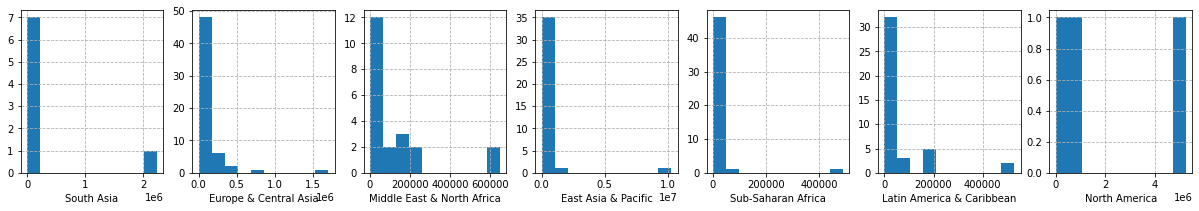

In [19]:
regiones = df['Region'].unique()
fig, axes = plt.subplots(1,len(regiones), figsize=(21,3))

for i in range(len(regiones)):
    axes[i].hist(df[df['Region'] == regiones[i]]['CO2 emission'])
    axes[i].set_xlabel(f'{regiones[i]}')
    axes[i].grid(True, linestyle='--')

p_values = []
for region in regiones:
    stat, prob, percentages = stats.anderson(df[df['Region'] == region]['CO2 emission'], dist='norm')  
    p_values.append(stat)
    if stat < prob[2]:
        print(f'Дані "{region}" відповідають нормальному закону')
    else:
        print(f'Дані "{region}" НЕ відповідають нормальному закону')
    
print(f'В {regiones[np.argmin(p_values)]} розподіл СО2 викидів найбільш близький до нормального.')


### Кругова діаграма для населення по регіонах

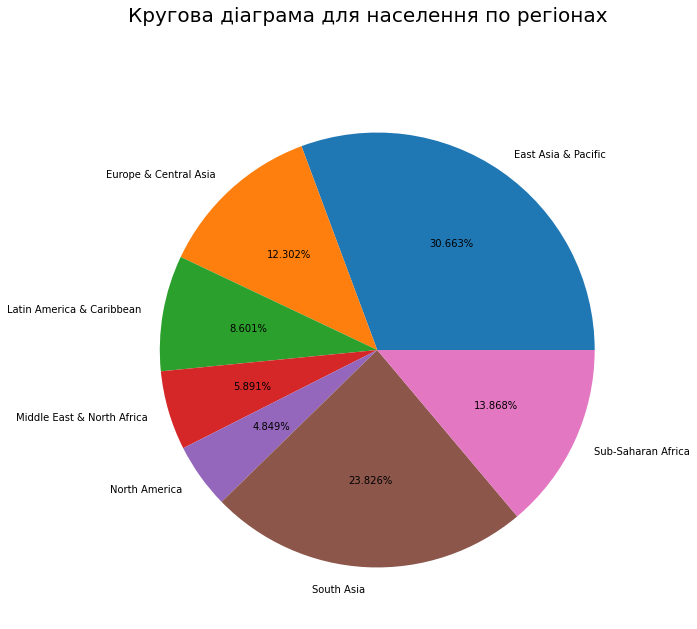

In [63]:
population_by_regiones = df.groupby(by='Region').sum()['Populatiion']
names = population_by_regiones.index
fig, axe = plt.subplots(1,1, figsize=(10,10))
axe.pie(population_by_regiones, labels=names, autopct='%1.3f%%')
fig.suptitle('Кругова діаграма для населення по регіонах', fontsize=20)
plt.show()